In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt


In [3]:
fire = pd.read_csv("CSV/fire404600.csv")
fire

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-0.0990,37.4320,313.7,3.8,1.8,2001-09-13,843,Terra,MODIS,25,6.03,281.3,64.1,D,0
1,-0.1350,37.4570,316.7,3.9,1.8,2001-09-13,843,Terra,MODIS,59,6.03,288.6,94.3,D,0
2,-0.1280,37.4616,339.6,3.9,1.8,2001-09-13,843,Terra,MODIS,90,6.03,289.6,295.5,D,0
3,-0.0933,37.4800,339.7,1.6,1.2,2001-09-14,748,Terra,MODIS,87,6.03,304.9,66.6,D,0
4,-0.0892,37.4513,345.7,1.6,1.2,2001-09-14,748,Terra,MODIS,92,6.03,299.6,87.1,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,-0.0837,37.4252,343.7,1.1,1.0,2022-03-26,1113,Aqua,MODIS,67,6.03,298.2,44.7,D,0
1229,-0.0731,37.4335,359.1,1.1,1.0,2022-03-26,1113,Aqua,MODIS,98,6.03,305.1,83.0,D,0
1230,-0.0745,37.4240,367.1,1.1,1.0,2022-03-26,1113,Aqua,MODIS,94,6.03,312.2,107.1,D,0
1231,-0.0823,37.4346,339.1,1.1,1.0,2022-03-26,1113,Aqua,MODIS,54,6.03,296.9,36.8,D,0


In [4]:
fire = fire.set_index("acq_date")

In [5]:
fire


,latitude,longitude,brightness,scan,track,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
acq_date,,,,,,,,,,,,,,
2001-09-13,-0.0990,37.4320,313.7,3.8,1.8,843,Terra,MODIS,25,6.03,281.3,64.1,D,0
2001-09-13,-0.1350,37.4570,316.7,3.9,1.8,843,Terra,MODIS,59,6.03,288.6,94.3,D,0
2001-09-13,-0.1280,37.4616,339.6,3.9,1.8,843,Terra,MODIS,90,6.03,289.6,295.5,D,0
2001-09-14,-0.0933,37.4800,339.7,1.6,1.2,748,Terra,MODIS,87,6.03,304.9,66.6,D,0
2001-09-14,-0.0892,37.4513,345.7,1.6,1.2,748,Terra,MODIS,92,6.03,299.6,87.1,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-26,-0.0837,37.4252,343.7,1.1,1.0,1113,Aqua,MODIS,67,6.03,298.2,44.7,D,0
2022-03-26,-0.0731,37.4335,359.1,1.1,1.0,1113,Aqua,MODIS,98,6.03,305.1,83.0,D,0
2022-03-26,-0.0745,37.4240,367.1,1.1,1.0,1113,Aqua,MODIS,94,6.03,312.2,107.1,D,0


<Axes: xlabel='latitude', ylabel='longitude'>

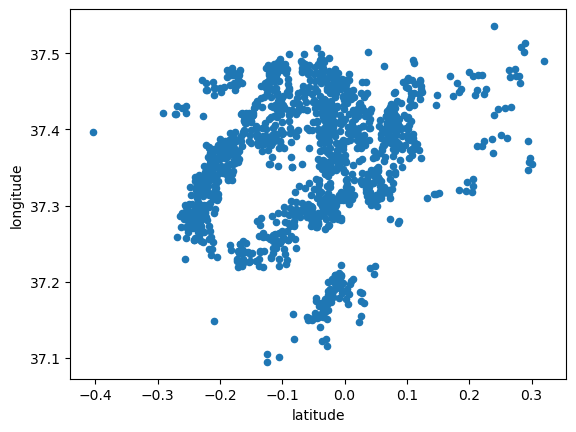

In [6]:
fire.plot(x="latitude", y="longitude", kind="scatter")

In [7]:
fire.columns


Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp',
       'daynight', 'type'],
      dtype='object')

In [8]:
# Convert 'acquisition_date' to datetime 
pd.to_datetime(fire.index)

DatetimeIndex(['2001-09-13', '2001-09-13', '2001-09-13', '2001-09-14',
               '2001-09-14', '2001-09-14', '2001-09-14', '2001-09-14',
               '2001-09-14', '2001-09-14',
               ...
               '2022-03-25', '2022-03-25', '2022-03-25', '2022-03-25',
               '2022-03-26', '2022-03-26', '2022-03-26', '2022-03-26',
               '2022-03-26', '2022-08-24'],
              dtype='datetime64[ns]', name='acq_date', length=1233, freq=None)

In [10]:
fire_lat = fire["latitude"]
fire_long = fire["longitude"]
 
#num_cells = 100
cell_size = 0.10001

min_lat, max_lat = min(fire['latitude']), max(fire['latitude'])
min_lon, max_lon = min(fire['longitude']), max(fire['longitude'])

# Calculate grid cell size
#cell_size = (max_lat - min_lat) / num_cells
#cell_size = (max_lon - min_lon) / num_cells

# Create grid
grid_lats = np.arange(min_lat, max_lat, cell_size)
grid_lons = np.arange(min_lon, max_lon, cell_size)

 #Step 3: Assign Fire Data to Grid Cells and Create Occurrence Matrix
fire_occurrences = np.zeros((len(grid_lats), len(grid_lons)), dtype=int)  # Matrix to store fire occurrence per grid cell

# Loop through fire data and assign to grid cells
for idx, fire_entry in fire.iterrows():
    lat_idx = np.searchsorted(grid_lats, fire_entry['latitude']) - 1
    lon_idx = np.searchsorted(grid_lons, fire_entry['longitude']) - 1

    # Mark presence of fire for corresponding grid cell
    fire_occurrences[lat_idx][lon_idx] += 1  # Increment occurrence count

# Convert the matrix into a DataFrame
grid_cells = []
for i, lat in enumerate(grid_lats):
    for j, lon in enumerate(grid_lons):
        grid_cells.append({'Latitude': lat, 'Longitude': lon, 'Fire_Occurrence': fire_occurrences[i][j]})

fire_occurrence_df = pd.DataFrame(grid_cells)

# Step 4: Output the new dataset representing fire occurrences in grid boxes
fire_occurrence_df.to_csv('fire_occurrence_dataset_2.csv', index=False)  # Save as CSV or desired format

<Axes: xlabel='latitude', ylabel='longitude'>

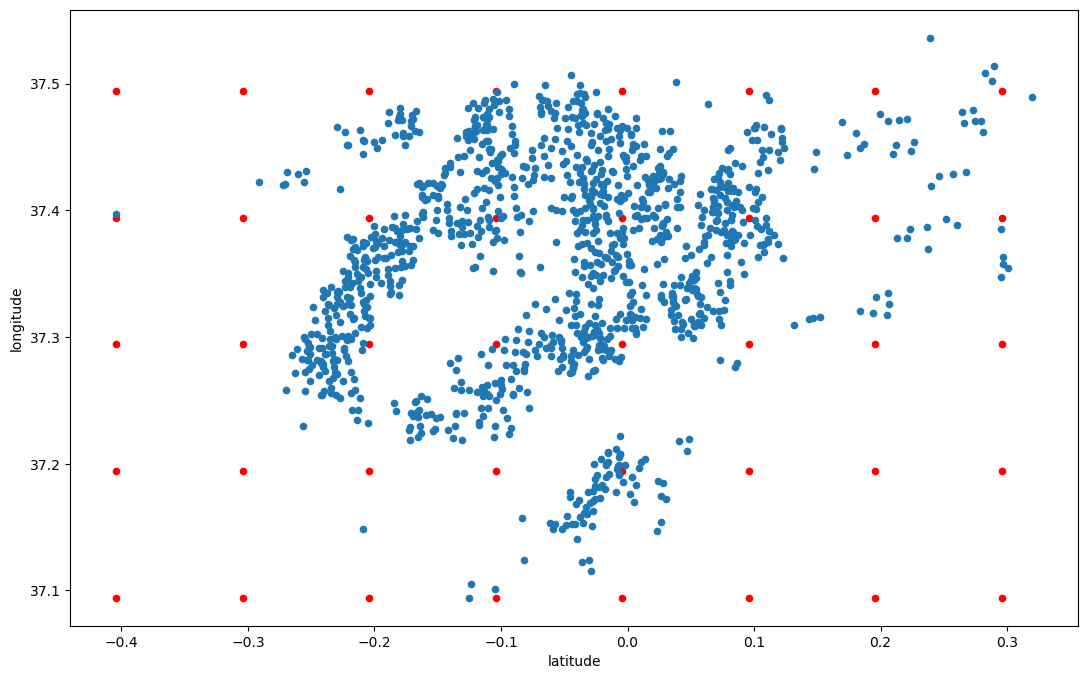

In [11]:
fig,ax = plt.subplots(figsize = (13,8))
df_grid = pd.read_csv("fire_occurrence_dataset_2.csv")
df_grid.plot(x="Latitude", y="Longitude",kind="scatter",ax= ax,color="red")

fire.plot(x ="latitude", y="longitude",kind = "scatter", ax=ax)



In [46]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:
fire = pd.read_csv("CSV/fire404600.csv")
fire

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-0.0990,37.4320,313.7,3.8,1.8,2001-09-13,843,Terra,MODIS,25,6.03,281.3,64.1,D,0
1,-0.1350,37.4570,316.7,3.9,1.8,2001-09-13,843,Terra,MODIS,59,6.03,288.6,94.3,D,0
2,-0.1280,37.4616,339.6,3.9,1.8,2001-09-13,843,Terra,MODIS,90,6.03,289.6,295.5,D,0
3,-0.0933,37.4800,339.7,1.6,1.2,2001-09-14,748,Terra,MODIS,87,6.03,304.9,66.6,D,0
4,-0.0892,37.4513,345.7,1.6,1.2,2001-09-14,748,Terra,MODIS,92,6.03,299.6,87.1,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,-0.0837,37.4252,343.7,1.1,1.0,2022-03-26,1113,Aqua,MODIS,67,6.03,298.2,44.7,D,0
1229,-0.0731,37.4335,359.1,1.1,1.0,2022-03-26,1113,Aqua,MODIS,98,6.03,305.1,83.0,D,0
1230,-0.0745,37.4240,367.1,1.1,1.0,2022-03-26,1113,Aqua,MODIS,94,6.03,312.2,107.1,D,0
1231,-0.0823,37.4346,339.1,1.1,1.0,2022-03-26,1113,Aqua,MODIS,54,6.03,296.9,36.8,D,0


In [48]:
fire.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [49]:
fire = fire.set_index("acq_date")

In [50]:
fire

,latitude,longitude,brightness,scan,track,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
acq_date,,,,,,,,,,,,,,
2001-09-13,-0.0990,37.4320,313.7,3.8,1.8,843,Terra,MODIS,25,6.03,281.3,64.1,D,0
2001-09-13,-0.1350,37.4570,316.7,3.9,1.8,843,Terra,MODIS,59,6.03,288.6,94.3,D,0
2001-09-13,-0.1280,37.4616,339.6,3.9,1.8,843,Terra,MODIS,90,6.03,289.6,295.5,D,0
2001-09-14,-0.0933,37.4800,339.7,1.6,1.2,748,Terra,MODIS,87,6.03,304.9,66.6,D,0
2001-09-14,-0.0892,37.4513,345.7,1.6,1.2,748,Terra,MODIS,92,6.03,299.6,87.1,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-26,-0.0837,37.4252,343.7,1.1,1.0,1113,Aqua,MODIS,67,6.03,298.2,44.7,D,0
2022-03-26,-0.0731,37.4335,359.1,1.1,1.0,1113,Aqua,MODIS,98,6.03,305.1,83.0,D,0
2022-03-26,-0.0745,37.4240,367.1,1.1,1.0,1113,Aqua,MODIS,94,6.03,312.2,107.1,D,0


In [51]:
pd.to_datetime = (fire.index)

In [52]:
# Define the boundaries for longitude and latitude
min_lon, max_lon = fire['longitude'].min(), fire['longitude'].max()
min_lat, max_lat = fire['latitude'].min(), fire['latitude'].max()

# Define grid size
grid_size = 0.5  # Change this to fit your desired grid size

# Create mesh grid
lon_grid, lat_grid = np.meshgrid(np.arange(min_lon, max_lon + grid_size, grid_size),
                                 np.arange(min_lat, max_lat + grid_size, grid_size))

# Flatten grid indices
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()

# Create grid indices
grid_indices = np.arange(len(lon_flat))

In [55]:
# Assign grid indices to each data point
#fire['grid_index'] = np.digitize(fire['longitude'], lon_flat) + \
                           #np.digitize(fire['latitude'], lat_flat) * (len(lon_flat) + 1)


    
    # Combine longitude and latitude into a tuple for each data point
#fire['coords'] = list(zip(fire['longitude'], fire['latitude']))

# Create a dictionary to map each coordinate to a grid index
#coord_to_index = {(lon, lat): idx for lon, lat, idx in zip(lon_flat, lat_flat, grid_indices)}

# Assign grid indices to each data point using the dictionary
#fire['grid_index'] = fire['coords'].map(coord_to_index)




# Combine longitude and latitude into a tuple for each data point
fire['coords'] = list(zip(fire['longitude'], fire['latitude']))

# Create a dictionary to map each coordinate to a grid index
coord_to_index = {(lon, lat): idx for lon, lat, idx in zip(lon_flat, lat_flat, grid_indices)}

# Assign grid indices to each data point using the map function and the created dictionary
fire['grid_index'] = fire['coords'].map(coord_to_index.get)



# Define a function to calculate grid indices for given coordinates
#def get_grid_index(lon, lat):
    #lon_idx = int((lon - min_lon) / grid_size)
    #lat_idx = int((lat - min_lat) / grid_size)
    #return lat_idx * ((max_lon - min_lon) / grid_size) + lon_idx

# Apply the function to create grid indices for each data point
#fire['grid_index'] = fire.apply(lambda row: get_grid_index(row['longitude'], row['latitude']), axis=1)

In [56]:
# Aggregate fire occurrences and calculate average bright_t31 per grid index
grid_aggregated = fire.groupby('grid_index').agg(
    fire_occurrences=('grid_index', 'count'),
    avg_bright_t31=('bright_t31', 'mean')
).reset_index()

In [57]:
fire.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp',
       'daynight', 'type', 'coords', 'grid_index'],
      dtype='object')

In [9]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from datetime import datetime

In [10]:
fire1 = pd.read_csv("CSV/fire404600.csv")
fire1

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-0.0990,37.4320,313.7,3.8,1.8,2001-09-13,843,Terra,MODIS,25,6.03,281.3,64.1,D,0
1,-0.1350,37.4570,316.7,3.9,1.8,2001-09-13,843,Terra,MODIS,59,6.03,288.6,94.3,D,0
2,-0.1280,37.4616,339.6,3.9,1.8,2001-09-13,843,Terra,MODIS,90,6.03,289.6,295.5,D,0
3,-0.0933,37.4800,339.7,1.6,1.2,2001-09-14,748,Terra,MODIS,87,6.03,304.9,66.6,D,0
4,-0.0892,37.4513,345.7,1.6,1.2,2001-09-14,748,Terra,MODIS,92,6.03,299.6,87.1,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,-0.0837,37.4252,343.7,1.1,1.0,2022-03-26,1113,Aqua,MODIS,67,6.03,298.2,44.7,D,0
1229,-0.0731,37.4335,359.1,1.1,1.0,2022-03-26,1113,Aqua,MODIS,98,6.03,305.1,83.0,D,0
1230,-0.0745,37.4240,367.1,1.1,1.0,2022-03-26,1113,Aqua,MODIS,94,6.03,312.2,107.1,D,0
1231,-0.0823,37.4346,339.1,1.1,1.0,2022-03-26,1113,Aqua,MODIS,54,6.03,296.9,36.8,D,0


<Axes: xlabel='latitude', ylabel='longitude'>

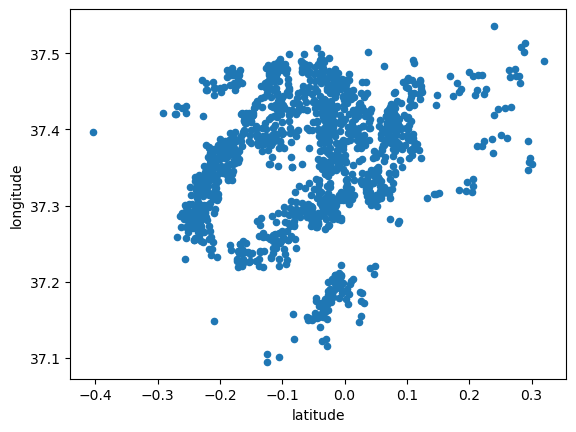

In [11]:
fire1.plot(x="latitude", y="longitude", kind="scatter")

In [12]:
#Creating meshgrid
# Define the boundaries for longitude and latitude
min_lon, max_lon = fire1['longitude'].min(), fire1['longitude'].max()
min_lat, max_lat = fire1['latitude'].min(), fire1['latitude'].max()

# Define grid size
grid_size = 0.5  # Change this to fit your desired grid size

# Create mesh grid
lon_grid, lat_grid = np.meshgrid(np.arange(min_lon, max_lon + grid_size, grid_size),
                                 np.arange(min_lat, max_lat + grid_size, grid_size))

# Flatten grid indices
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()

# Create grid indices
grid_indices = np.arange(len(lon_flat))

<Axes: >

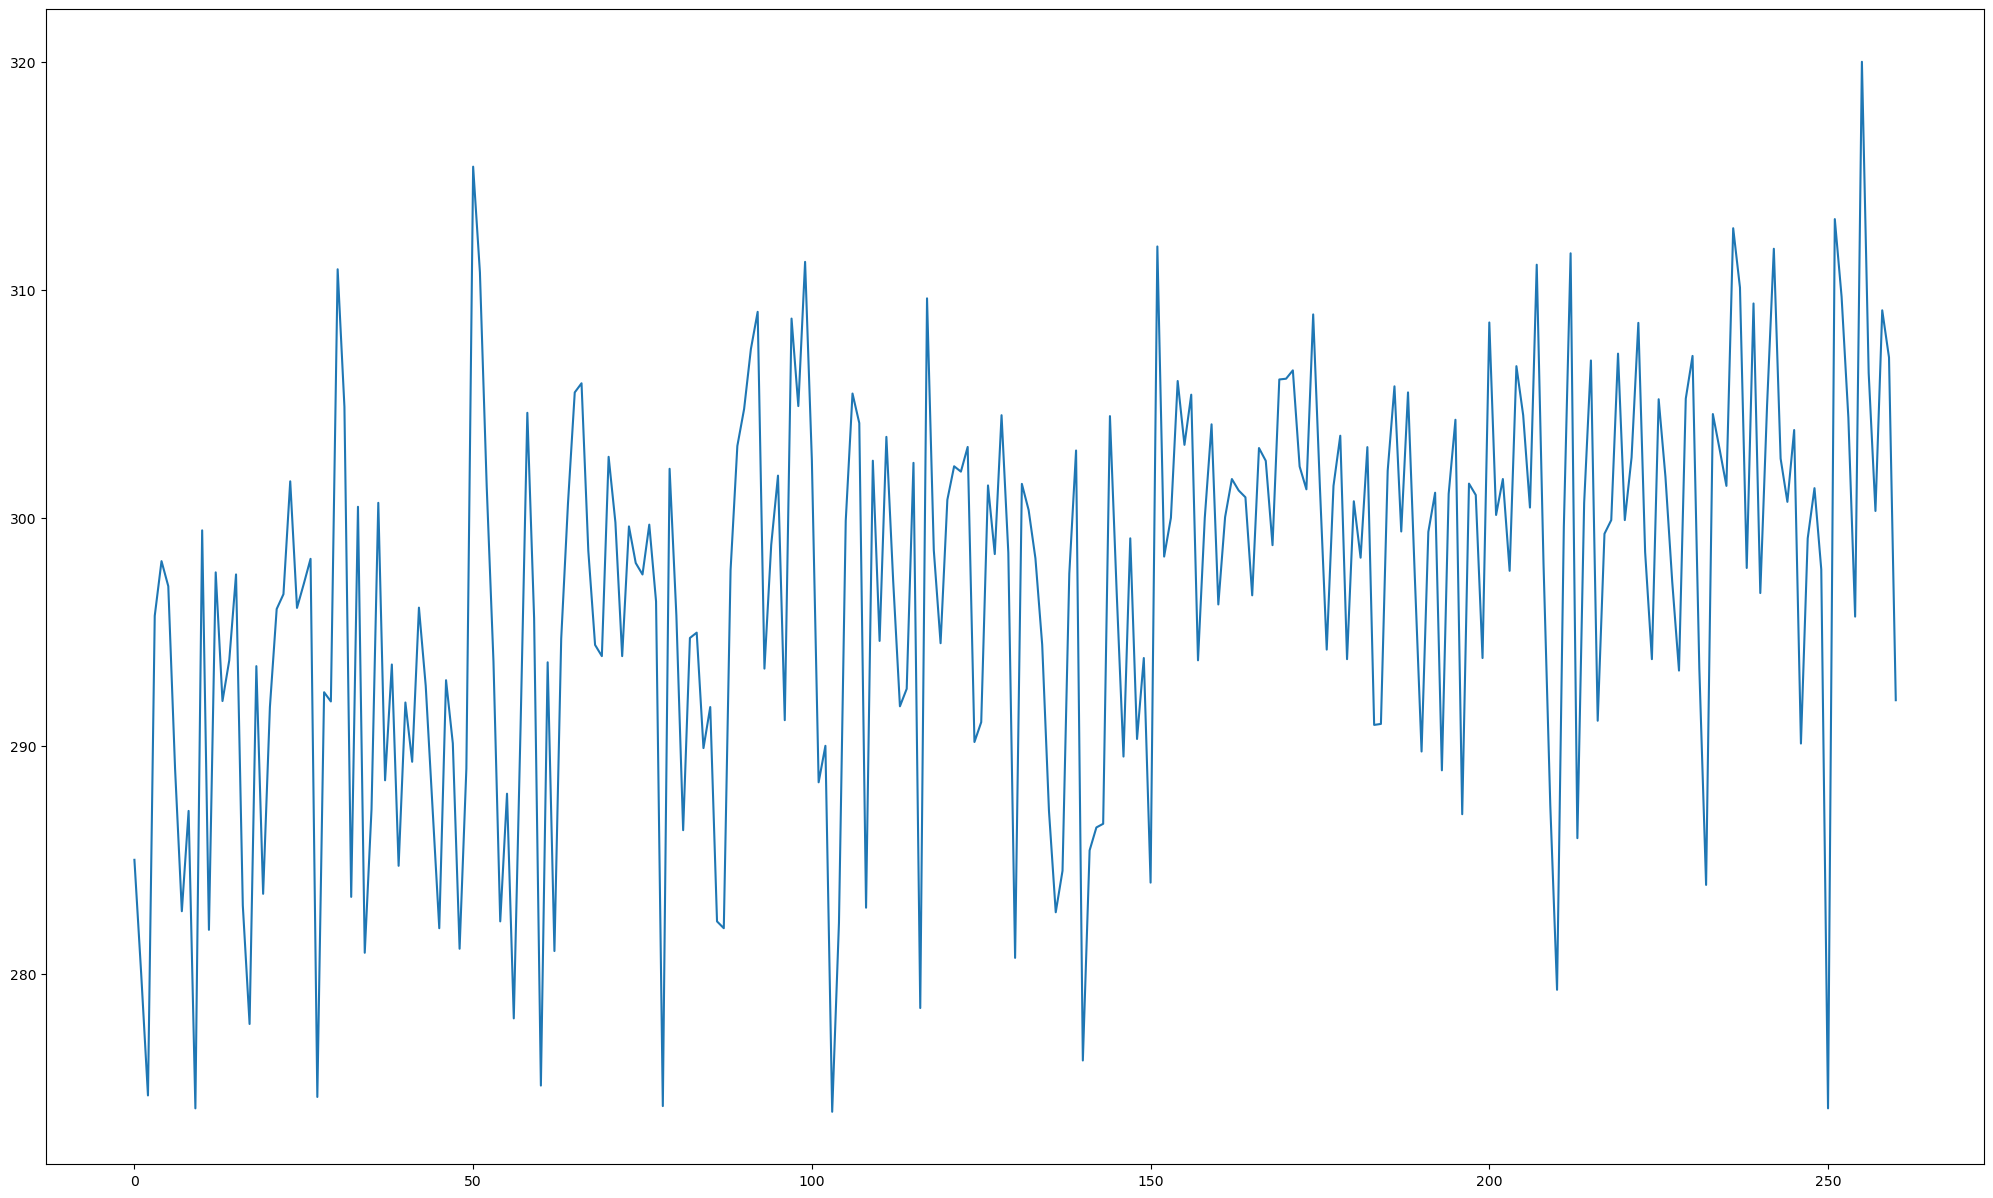

In [10]:
df_grid['avg_bright_t31_yearly'].plot(x="year",style='-', figsize=(25,15))

In [109]:
fire_occurrence  = fire1["bright_t31"]

In [78]:
import numpy as np
x = np.arange(0.1,0.5, step=0.1)
y = np.arange(0.1,0.5, step=0.1)
xx,yy = np.meshgrid(x,y)
flattenxx = xx.ravel()
flattenxx[3]

0.4

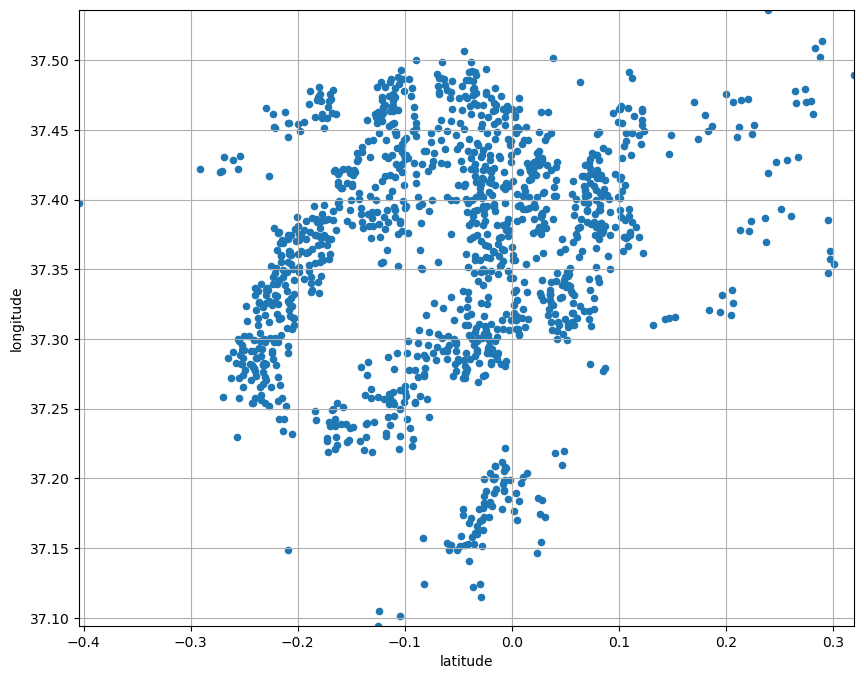

In [86]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a Pandas DataFrame
fire1 = pd.read_csv('CSV/fire404600.csv')

# Step 2: Filter the dataset for the specified date range (2000 to 2023)
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1 = fire1[(fire1['acq_date'].dt.year >= 2000) & (fire1['acq_date'].dt.year <= 2023)]

# Step 2: Create Grid Boxes (Meshgrid)
# Define latitude and longitude ranges
lat_min, lat_max = fire1['latitude'].min(), fire1['latitude'].max()
lon_min, lon_max = fire1['longitude'].min(), fire1['longitude'].max()

lon = np.linspace(lon_min, lon_max, num=10)
lat = np.linspace(lat_min, lat_max, num=10)
mesh_lat, mesh_lon = np.meshgrid(lat, lon)
flatten = mesh_lat.ravel(), mesh_lon.ravel()
flatten[1]  



fig, ax = plt.subplots(figsize=(10, 8))

# Set x and y axis limits
ax.set_xlim(lat_min, lat_max)
ax.set_ylim(lon_min, lon_max)

plt.grid(True)

fire1.plot(x ="latitude", y="longitude",kind = "scatter", ax=ax)
plt.grid()


# Step 3: Assign Data Points to Grid Boxes
#fire1['grid_box_lat'] = np.digitize(fire1['latitude'], lat)
#fire1['grid_box_lon'] = np.digitize(fire1['longitude'], lon)





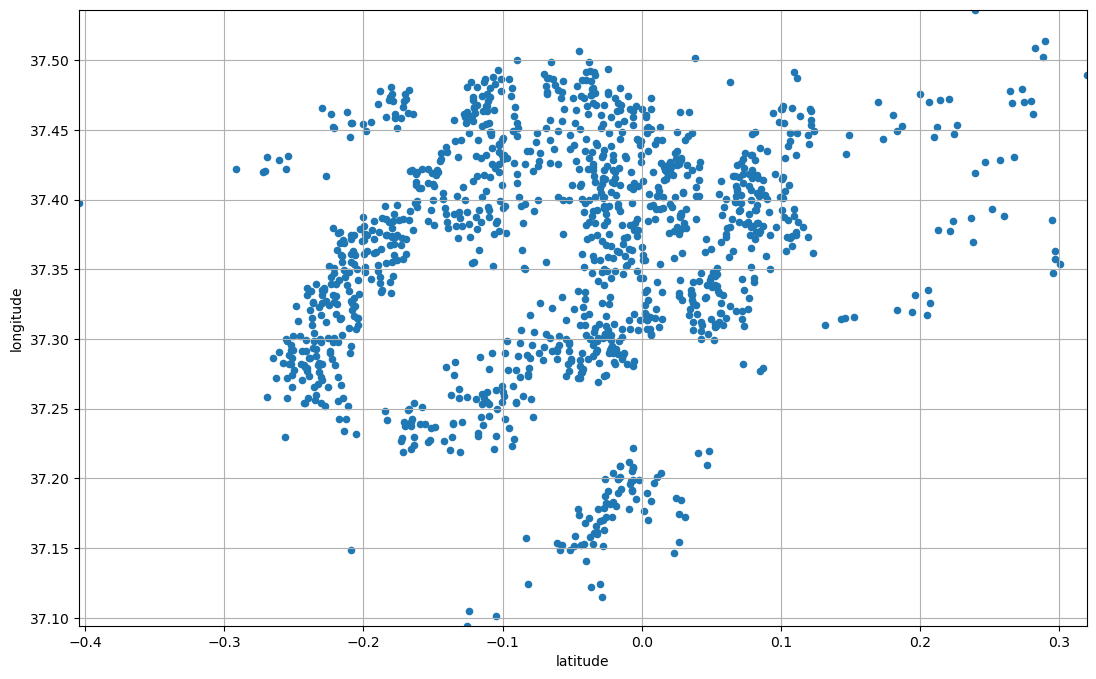

In [91]:
lon = np.linspace(lon_min, lon_max, num =10)
lat = np.linspace(lat_min, lat_max, num=10)
mesh_lat, mesh_lon = np.meshgrid(lat, lon)
flatten = mesh_lat.ravel(), mesh_lon.ravel()
flatten[0],flatten[1] 


fig,ax = plt.subplots(figsize = (13,8))
# Set x and y axis limits
ax.set_xlim(lat_min, lat_max)
ax.set_ylim(lon_min, lon_max)

fire1.plot(x ="latitude", y="longitude",kind = "scatter", ax=ax)
plt.grid(True)


# Calculate grid_box
lon_indices = np.digitize(fire1['longitude'], lon) - 1
lat_indices = np.digitize(fire1['latitude'], lat) - 1
fire1['grid_box'] = lat_indices * len(lon) + lon_indices *len(lat)

# Step 4: Aggregate Data
agg_data = fire1.groupby('grid_box').agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_data.columns = ['grid_box', 'fire_occurrences', 'avg_bright_t31']

# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1['year'] = fire1['acq_date'].dt.year
fire1['month'] = fire1['acq_date'].dt.month
fire1['semi_annual'] = (fire1['month'] - 1) // 6 + 1

agg_yearly = fire1.groupby(['grid_box', 'year']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_yearly.columns = ['grid_box', 'year', 'fire_occurrences_yearly', 'avg_bright_t31_yearly']

agg_monthly = fire1.groupby(['grid_box', 'year', 'month']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_monthly.columns = ['grid_box', 'year', 'month', 'fire_occurrences_monthly', 'avg_bright_t31_monthly']

agg_semi_annual = fire1.groupby(['grid_box', 'year', 'semi_annual']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_semi_annual.columns = ['grid_box', 'year', 'semi_annual', 'fire_occurrences_semi_annual', 'avg_bright_t31_semi_annual']

# Step 6: Create DataFrames for Yearly, Monthly, and Semi-Annual Aggregates

# Export the DataFrames to CSV files
agg_yearly.to_csv('yearly_ski.csv', index=False)


In [ ]:
# Step 4: Aggregate Data
agg_data = fire1.groupby('grid_box').agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_data.columns = ['grid_box', 'fire_occurrences', 'avg_bright_t31']

# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1['year'] = fire1['acq_date'].dt.year
fire1['month'] = fire1['acq_date'].dt.month
fire1['semi_annual'] = (fire1['month'] - 1) // 6 + 1

agg_yearly = fire1.groupby(['grid_box', 'year']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_yearly.columns = ['grid_box', 'year', 'fire_occurrences_yearly', 'avg_bright_t31_yearly']

agg_monthly = fire1.groupby(['grid_box', 'year', 'month']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_monthly.columns = ['grid_box', 'year', 'month', 'fire_occurrences_monthly', 'avg_bright_t31_monthly']

agg_semi_annual = fire1.groupby(['grid_box', 'year', 'semi_annual']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_semi_annual.columns = ['grid_box', 'year', 'semi_annual', 'fire_occurrences_semi_annual', 'avg_bright_t31_semi_annual']

# Step 6: Create DataFrames for Yearly, Monthly, and Semi-Annual Aggregates

# Export the DataFrames to CSV files
agg_yearly.to_csv('yearly_skip.csv', index=False)


In [92]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

newf = pd .read_csv("yearly_ski.csv")

In [93]:
newf

,grid_box,year,fire_occurrences_yearly,avg_bright_t31_yearly
0,30,2005,1,277.800000
1,30,2011,1,281.100000
2,30,2014,2,274.600000
3,30,2020,1,289.000000
4,40,2003,1,297.700000
...,...,...,...,...
143,150,2003,4,300.300000
144,150,2004,2,309.100000
145,160,2004,3,307.033333
146,170,2003,1,292.000000


In [97]:
newf.set_index('grid_box')

,year,fire_occurrences_yearly,avg_bright_t31_yearly
grid_box,,,
30,2005,1,277.800000
30,2011,1,281.100000
30,2014,2,274.600000
30,2020,1,289.000000
40,2003,1,297.700000
...,...,...,...
150,2003,4,300.300000
150,2004,2,309.100000
160,2004,3,307.033333


<Axes: xlabel='grid_box', ylabel='avg_bright_t31_yearly'>

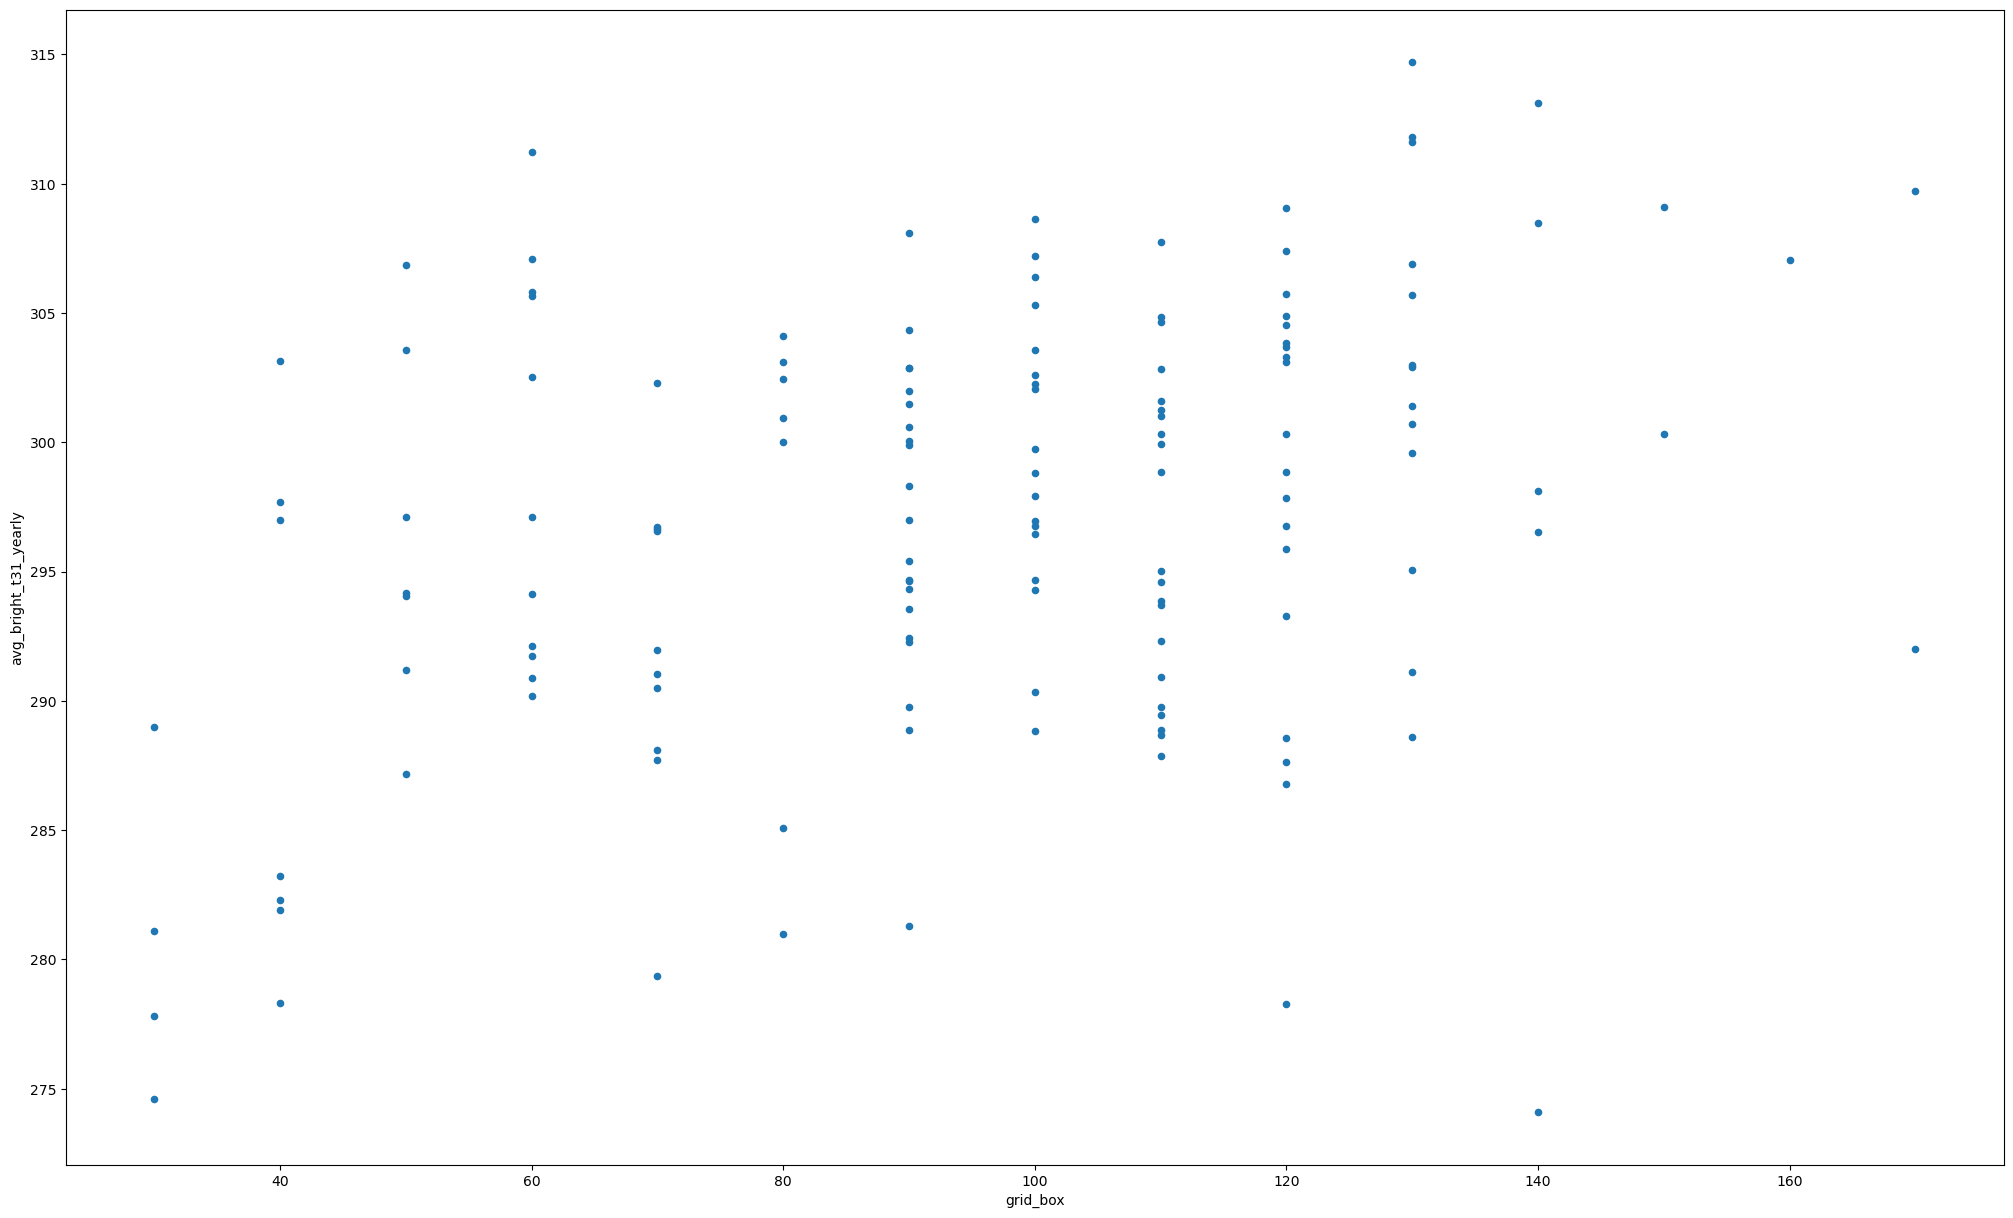

In [108]:
newf.plot(x= 'grid_box',y="avg_bright_t31_yearly",kind='scatter', figsize=(25,15))

In [ ]:
# Assign data points to grid boxes
fire1['grid_box'] = np.digitize(fire1['latitude'], lat) * len(lon) + np.digitize(fire1['longitude'], lon)

# Calculate aggregates - frequency and average 'bright_t31'
agg_data = fire1.groupby(['grid_box']).agg({'acq_date': 'count', 'bright_t31': 'mean'}).reset_index()
agg_data.columns = ['grid_box', 'fire_occurrences', 'avg_bright_t31']

# Aggregate on yearly, monthly, semi-annually basis
agg_data['year'] = pd.to_datetime(fire1['acq_date']).dt.year
agg_data['month'] = pd.to_datetime(fire1['acq_date']).dt.month
agg_data['semi_annual'] = pd.to_datetime(fire1['acq_date']).dt.to_period('6M')

# Group by grid_box, year, month, semi_annual
yearly_agg = agg_data.groupby(['grid_box', 'year']).agg({'fire_occurrences': 'sum', 'avg_bright_t31': 'mean'}).reset_index()
monthly_agg = agg_data.groupby(['grid_box', 'year', 'month']).agg({'fire_occurrences': 'sum', 'avg_bright_t31': 'mean'}).reset_index()
semi_annual_agg = agg_data.groupby(['grid_box', 'semi_annual']).agg({'fire_occurrences': 'sum', 'avg_bright_t31': 'mean'}).reset_index()

# Export to CSV
yearly_agg.to_csv('yearly_aggregated_data2.csv', index=False)
monthly_agg.to_csv('monthly_aggregated_data2.csv', index=False)
semi_annual_agg.to_csv('semi_annual_aggregated_data2.csv', index=False)

In [ ]:
# Calculate aggregates - frequency and average 'bright_t31'
agg_data = fire1.groupby(['grid']).agg({'acq_date': 'count', 'bright_t31': 'mean'}).reset_index()
agg_data.columns = ['grid', 'fire_occurrences', 'avg_bright_t31']

# Aggregate on yearly, monthly, semi-annually basis
agg_data['year'] = pd.to_datetime(fire1['acq_date']).dt.year
agg_data['month'] = pd.to_datetime(fire1['acq_date']).dt.month
agg_data['semi_annual'] = pd.to_datetime(fire1['acq_date']).dt.to_period('6M')

# Group by grid_box, year, month, semi_annual
yearly_agg = agg_data.groupby(['grid', 'year']).agg({'fire_occurrences': 'sum', 'avg_bright_t31': 'mean'}).reset_index()
monthly_agg = agg_data.groupby(['grid', 'year', 'month']).agg({'fire_occurrences': 'sum', 'avg_bright_t31': 'mean'}).reset_index()
semi_annual_agg = agg_data.groupby(['grid', 'semi_annual']).agg({'fire_occurrences': 'sum', 'avg_bright_t31': 'mean'}).reset_index()

# Export to CSV
yearly_agg.to_csv('yearly_aggregated_data3.csv', index=False)
monthly_agg.to_csv('monthly_aggregated_data3.csv', index=False)
semi_annual_agg.to_csv('semi_annual_aggregated_data3.csv', index=False)

In [ ]:
 #Step 3: Assign Fire Data to Grid Cells and Create Occurrence Matrix
fire_occurrences = np.zeros((len(grid_lats), len(grid_lons)), dtype=int)  # Matrix to store fire occurrence per grid cell

# Loop through fire data and assign to grid cells
for idx, fire_entry in fire.iterrows():
    lat_idx = np.searchsorted(grid_lats, fire_entry['latitude']) - 1
    lon_idx = np.searchsorted(grid_lons, fire_entry['longitude']) - 1

    # Mark presence of fire for corresponding grid cell
    fire_occurrences[lat_idx][lon_idx] += 1  # Increment occurrence count

# Convert the matrix into a DataFrame
grid_cells = []
for i, lat in enumerate(grid_lats):
    for j, lon in enumerate(grid_lons):
        grid_cells.append({'Latitude': lat, 'Longitude': lon, 'Fire_Occurrence': fire_occurrences[i][j]})

fire_occurrence_df = pd.DataFrame(grid_cells)

# Step 4: Output the new dataset representing fire occurrences in grid boxes
fire_occurrence_df.to_csv('fire_occurrence_dataset_2.csv', index=False)  # Save as CSV or desired format

In [ ]:
# Assign data points to grid boxes
#fire1['grid'] = np.digitize(fire1['latitude'], lat) * len(lon) + np.digitize(fire1['longitude'], lon)
num_rows = 7
num_cols = 9

# Assuming fire_occurrence is reshaped to match the grid dimensions
fire_occurrence_values = fire_occurrence.values.reshape((num_rows, num_cols))

# Assigning fire occurrence values to each grid box
grid_values = {}
for i in range(num_rows):
    for j in range(num_cols):
        grid_values[(i, j)] = {
            'fire_occurrence': fire_occurrence_values[i, j],
            'latitude': mesh_lat[i, j],
            'longitude': mesh_lon[i, j]
        }

# Printing the grid box number and fire occurrence value
for i in range(num_rows):
    for j in range(num_cols):
        print(f"Grid Box ({i}, {j}): Fire Occurrence - {grid_values[(i, j)]['fire_occurrence']}")

# Visualizing the grid (scatter plot with numbers)
plt.figure(figsize=(8, 6))
for i in range(num_rows):
    for j in range(num_cols):
        plt.text(mesh_lon[i, j], mesh_lat[i, j], f"({i},{j})", ha='center', va='center', color='black')

plt.scatter(mesh_lon, mesh_lat, marker='o', c=fire_occurrence_values, cmap='hot', edgecolors='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grid Boxes with Fire Occurrence Values')
plt.colorbar(label='Fire Occurrence')
plt.grid(True)
plt.show()

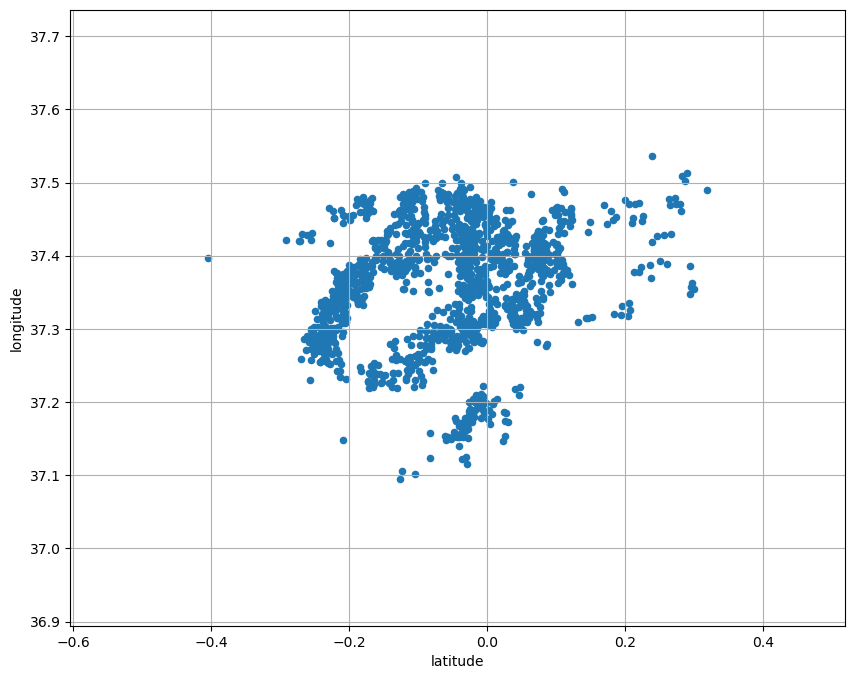

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a Pandas DataFrame
fire1 = pd.read_csv('CSV/fire404600.csv')

# Step 2: Filter the dataset for the specified date range (2000 to 2023)
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1 = fire1[(fire1['acq_date'].dt.year >= 2000) & (fire1['acq_date'].dt.year <= 2023)]

# Step 2: Create Grid Boxes (Meshgrid)
# Define latitude and longitude ranges
lat_min, lat_max = fire1['latitude'].min() - 0.2, fire1['latitude'].max() + 0.2
lon_min, lon_max = fire1['longitude'].min() - 0.2, fire1['longitude'].max() + 0.2

lon = np.linspace(lon_min, lon_max)
lat = np.linspace(lat_min, lat_max)
mesh_lat, mesh_lon = np.meshgrid(lat, lon)

fig, ax = plt.subplots(figsize=(10, 8))

# Set x and y axis limits
ax.set_xlim(lat_min, lat_max)
ax.set_ylim(lon_min, lon_max)

plt.grid(True)

fire1.plot(x="latitude", y="longitude", kind="scatter", ax=ax)
plt.grid()

num_columns = len(lon)
num_rows = len(lat)
 

fire1['grid_box_lat'] = np.digitize(fire1['latitude'], lat)
fire1['grid_box_lon'] = np.digitize(fire1['longitude'], lon)
fire1['grid_box'] = (fire1['grid_box_lat'] + 1) * num_columns + fire1['grid_box_lon']

# Step 4: Aggregate Data
agg_data = fire1.groupby('grid_box').agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_data.columns = ['grid_box', 'fire_occurrences', 'avg_bright_t31']

# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1['year'] = fire1['acq_date'].dt.year
fire1['month'] = fire1['acq_date'].dt.month
fire1['semi_annual'] = (fire1['month'] - 1) // 6 + 1

agg_yearly = fire1.groupby(['grid_box', 'year']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_yearly.columns = ['grid_box', 'year', 'fire_occurrences_yearly', 'avg_bright_t31_yearly']

agg_monthly = fire1.groupby(['grid_box', 'year', 'month']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_monthly.columns = ['grid_box', 'year', 'month', 'fire_occurrences_monthly', 'avg_bright_t31_monthly']

agg_semi_annual = fire1.groupby(['grid_box', 'year', 'semi_annual']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_semi_annual.columns = ['grid_box', 'year', 'semi_annual', 'fire_occurrences_semi_annual', 'avg_bright_t31_semi_annual']


# Export the DataFrames to CSV files
agg_yearly.to_csv('yearly_sure.csv', index=False)

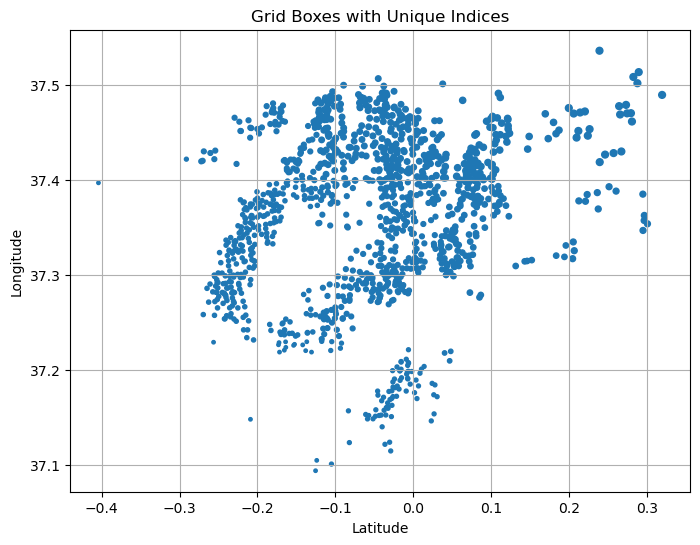

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume fire1 is your DataFrame with latitude and longitude columns

# Define the number of bins for latitude and longitude
num_lat_bins = 7
num_lon_bins = 5

# Calculate latitude and longitude bin edges
lat_min, lat_max = fire1['latitude'].min() - 0.2, fire1['latitude'].max() + 0.2
lon_min, lon_max = fire1['longitude'].min() - 0.2, fire1['longitude'].max() + 0.2

lat_bins = np.linspace(lat_min, lat_max, num_lat_bins + 1)
lon_bins = np.linspace(lon_min, lon_max, num_lon_bins + 1)

# Digitize latitude and longitude values into respective bins
fire1['grid_box_lat'] = np.digitize(fire1['latitude'], lat_bins)
fire1['grid_box_lon'] = np.digitize(fire1['longitude'], lon_bins)

# Create a unique combined index for each grid box
fire1['grid_box'] = fire1['grid_box_lat'] * fire1['grid_box_lon']

# Visualize the grid boxes (scatter plot with unique indices)
plt.figure(figsize=(8, 6))
plt.scatter(fire1['latitude'], fire1['longitude'], fire1['grid_box'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Grid Boxes with Unique Indices')
#plt.colorbar(label='Grid Box Index')
plt.grid(True)
plt.show()

# Continue with your data aggregation or analysis based on these unique grid box indices
# ... (continue with your aggregation and further processing steps)
# Step 4: Aggregate Data
agg_data = fire1.groupby('grid_box').agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_data.columns = ['grid_box', 'fire_occurrences', 'avg_bright_t31']

# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1['year'] = fire1['acq_date'].dt.year
fire1['month'] = fire1['acq_date'].dt.month
fire1['semi_annual'] = (fire1['month'] - 1) // 6 + 1

agg_yearly = fire1.groupby(['grid_box', 'year']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_yearly.columns = ['grid_box', 'year', 'fire_occurrences_yearly', 'avg_bright_t31_yearly']

agg_monthly = fire1.groupby(['grid_box', 'year', 'month']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_monthly.columns = ['grid_box', 'year', 'month', 'fire_occurrences_monthly', 'avg_bright_t31_monthly']

agg_semi_annual = fire1.groupby(['grid_box', 'year', 'semi_annual']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_semi_annual.columns = ['grid_box', 'year', 'semi_annual', 'fire_occurrences_semi_annual', 'avg_bright_t31_semi_annual']

# Step 6: Create DataFrames for Yearly, Monthly, and Semi-Annual Aggregates

# Export the DataFrames to CSV files
agg_yearly.to_csv('yearly_seeee.csv', index=False)

      latitude  longitude  grid_index
0      -0.0990    37.4320           1
1      -0.1350    37.4570           1
2      -0.1280    37.4616           1
3      -0.0933    37.4800           1
4      -0.0892    37.4513           1
...        ...        ...         ...
1228   -0.0837    37.4252           1
1229   -0.0731    37.4335           1
1230   -0.0745    37.4240           1
1231   -0.0823    37.4346           1
1232    0.1203    37.4401           2

[1233 rows x 3 columns]


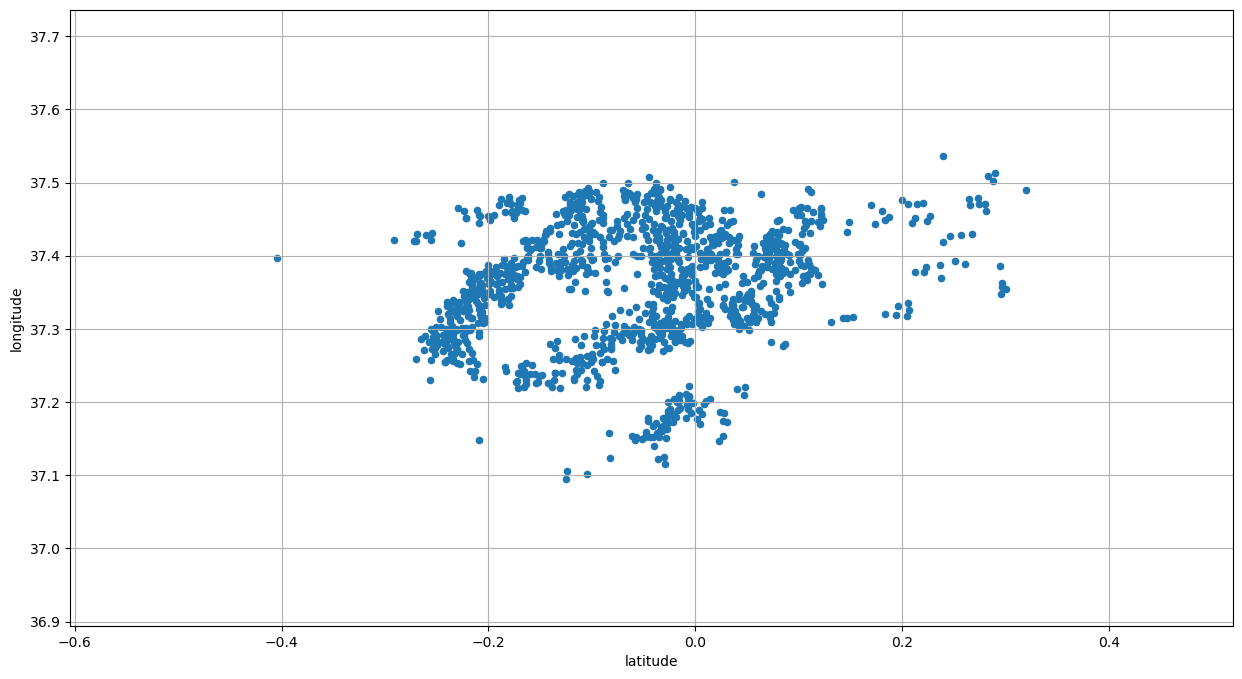

In [3]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file into a Pandas DataFrame
fire1 = pd.read_csv('CSV/fire404600.csv')

# Step 2: Filter the dataset for the specified date range (2000 to 2023)
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1 = fire1[(fire1['acq_date'].dt.year >= 2000) & (fire1['acq_date'].dt.year <= 2023)]

# Define the number of bins for latitude and longitude
num_lat_bins = 8
num_lon_bins = 7

# Calculate latitude and longitude bin edges
lat_min, lat_max = fire1['latitude'].min()-0.2, fire1['latitude'].max()+0.2
lon_min, lon_max = fire1['longitude'].min()-0.2, fire1['longitude'].max()+0.2

lat_bins = np.linspace(lat_min, lat_max, num_lat_bins + 1)
lon_bins = np.linspace(lon_min, lon_max, num_lon_bins + 1)

# Digitize latitude and longitude values into respective bins
fire1['grid_box_lat'] = np.digitize(fire1['latitude'], lat_bins)
fire1['grid_box_lon'] = np.digitize(fire1['longitude'],lon_bins)
fire1['grid_box'] = fire1['grid_box_lat']* fire1['grid_box_lon']
# Create a unique sequential index for each grid cell
fire1['grid_index'] = pd.factorize((fire1['grid_box_lat'].astype(str) + '_' + fire1['grid_box_lon'].astype(str)))[0] + 1

# Displaying the DataFrame with the unique index for each grid cell
print(fire1[['latitude', 'longitude', 'grid_index']])
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid(True)


# Set x and y axis limits
ax.set_xlim(lat_min, lat_max)
ax.set_ylim(lon_min, lon_max)
fire1.plot(x="latitude", y="longitude", kind="scatter", ax=ax)
plt.grid()

# Step 4: Aggregate Data
agg_data = fire1.groupby('grid_box').agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_data.columns = ['grid_box', 'fire_occurrences', 'avg_bright_t31']

# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1['year'] = fire1['acq_date'].dt.year
fire1['month'] = fire1['acq_date'].dt.month
fire1['semi_annual'] = (fire1['month'] - 1) // 6 + 1

agg_yearly = fire1.groupby(['grid_box', 'year']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_yearly.columns = ['grid_box', 'year', 'fire_occurrences_yearly', 'avg_bright_t31_yearly']

agg_monthly = fire1.groupby(['grid_box', 'year', 'month']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_monthly.columns = ['grid_box', 'year', 'month', 'fire_occurrences_monthly', 'avg_bright_t31_monthly']

agg_semi_annual = fire1.groupby(['grid_box', 'year', 'semi_annual']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_semi_annual.columns = ['grid_box', 'year', 'semi_annual', 'fire_occurrences_semi_annual', 'avg_bright_t31_semi_annual']

# Step 6: Create DataFrames for Yearly, Monthly, and Semi-Annual Aggregates

# Export the DataFrames to CSV files

agg_yearly.to_csv('yearly_seeee2.csv', index=False)

In [124]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file into a Pandas DataFrame
fire1 = pd.read_csv('CSV/fire404600.csv')

# Step 2: Filter the dataset for the specified date range (2000 to 2023)
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1 = fire1[(fire1['acq_date'].dt.year >= 2000) & (fire1['acq_date'].dt.year <= 2023)]

# Define the number of bins for latitude and longitude
num_lat_bins = 8
num_lon_bins = 7

# Calculate latitude and longitude bin edges
lat_min, lat_max = fire1['latitude'].min()-0.2, fire1['latitude'].max()+0.2
lon_min, lon_max = fire1['longitude'].min()-0.2, fire1['longitude'].max()+0.2

lat_bins = np.linspace(lat_min, lat_max, num_lat_bins + 1)
lon_bins = np.linspace(lon_min, lon_max, num_lon_bins + 1)

# Digitize latitude and longitude values into respective bins
fire1['grid_box_lat'] = np.digitize(fire1['latitude'], lat_bins)
fire1['grid_box_lon'] = np.digitize(fire1['longitude'],lon_bins)
fire1['grid_box'] = fire1['grid_box_lat']* fire1['grid_box_lon']
# Create a unique sequential index for each grid cell
fire1['grid_index'] = pd.factorize((fire1['grid_box_lat'].astype(str)+fire1['grid_box_lon'].astype(str)))[0] + 1

# Displaying the DataFrame with the unique index for each grid cell
print(fire1[['latitude', 'longitude', 'grid_index']])

      latitude  longitude  grid_index
0      -0.0990    37.4320           1
1      -0.1350    37.4570           1
2      -0.1280    37.4616           1
3      -0.0933    37.4800           1
4      -0.0892    37.4513           1
...        ...        ...         ...
1228   -0.0837    37.4252           1
1229   -0.0731    37.4335           1
1230   -0.0745    37.4240           1
1231   -0.0823    37.4346           1
1232    0.1203    37.4401           2

[1233 rows x 3 columns]


      latitude  longitude  grid_index
0      -0.0990    37.4320         1.0
1      -0.1350    37.4570         1.0
2      -0.1280    37.4616         1.0
3      -0.0933    37.4800         1.0
4      -0.0892    37.4513         1.0
...        ...        ...         ...
1228   -0.0837    37.4252         1.0
1229   -0.0731    37.4335         1.0
1230   -0.0745    37.4240         1.0
1231   -0.0823    37.4346         1.0
1232    0.1203    37.4401         1.0

[1233 rows x 3 columns]


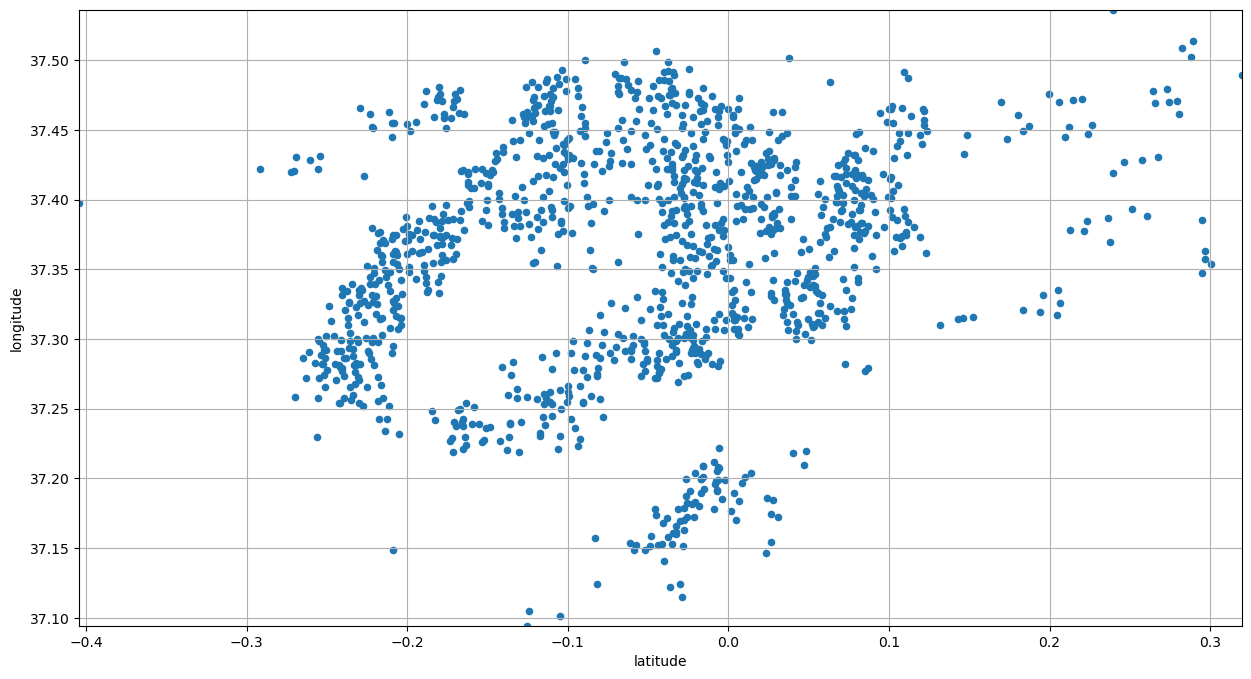

In [4]:
import pandas as pd
import numpy as np


# Step 1: Read the CSV file into a Pandas DataFrame
fire1 = pd.read_csv('CSV/fire404600.csv')

# Step 2: Filter the dataset for the specified date range (2000 to 2023)
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1 = fire1[(fire1['acq_date'].dt.year >= 2000) & (fire1['acq_date'].dt.year <= 2023)]
# Define the number of rows and columns for the grid
num_rows = 10
num_cols = 10

# Calculate latitude and longitude ranges
lat_min, lat_max = fire1['latitude'].min(), fire1['latitude'].max()
lon_min, lon_max = fire1['longitude'].min(), fire1['longitude'].max()

# Calculate the step size for latitude and longitude
lat_step = (lat_max - lat_min) / num_rows
lon_step = (lon_max - lon_min) / num_cols

# Digitize latitude and longitude values into respective bins
fire1['grid_index'] = ((fire1['latitude'] - lat_min) // num_rows) * num_cols + ((fire1['longitude'] - lon_min) // num_cols) + 1
 
# Displaying the DataFrame with the singular index for each rectangular cell
print(fire1[['latitude', 'longitude', 'grid_index']])

fig, ax = plt.subplots(figsize=(15, 8))
plt.grid(True)


# Set x and y axis limits
ax.set_xlim(lat_min, lat_max)
ax.set_ylim(lon_min, lon_max)
fire1.plot(x="latitude", y="longitude", kind="scatter", ax=ax)
plt.grid()

# Step 4: Aggregate Data
agg_data = fire1.groupby('grid_index').agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_data.columns = ['grid_index', 'fire_occurrences', 'avg_bright_t31']

# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1['year'] = fire1['acq_date'].dt.year
fire1['month'] = fire1['acq_date'].dt.month
fire1['semi_annual'] = (fire1['month'] - 1) // 6 + 1

agg_yearly = fire1.groupby(['grid_index', 'year']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_yearly.columns = ['grid_index', 'year', 'fire_occurrences_yearly', 'avg_bright_t31_yearly']

agg_monthly = fire1.groupby(['grid_index', 'year', 'month']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_monthly.columns = ['grid_box', 'year', 'month', 'fire_occurrences_monthly', 'avg_bright_t31_monthly']

agg_semi_annual = fire1.groupby(['grid_index', 'year', 'semi_annual']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_semi_annual.columns = ['grid_index', 'year', 'semi_annual', 'fire_occurrences_semi_annual', 'avg_bright_t31_semi_annual']

# Step 6: Create DataFrames for Yearly, Monthly, and Semi-Annual Aggregates

# Export the DataFrames to CSV files

agg_yearly.to_csv('yearly_seeee3.csv', index=False)

In [63]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file into a Pandas DataFrame
fire1 = pd.read_csv('CSV/fire404600.csv')

# Step 2: Filter the dataset for the specified date range (2000 to 2023)
fire1['acq_date'] = pd.to_datetime(fire1['acq_date'])
fire1 = fire1[(fire1['acq_date'].dt.year >= 2000) & (fire1['acq_date'].dt.year <= 2023)]


# Define the number of rows and columns based on the length of latitudes and longitudes
num_columns = len(np.unique(fire1['longitude']))
num_rows = len(np.unique(fire1['latitude']))

# Digitize latitude and longitude values into respective bins
fire1['grid_box_lat'] = np.digitize(fire1['latitude'], np.unique(fire1['latitude']))
fire1['grid_box_lon'] = np.digitize(fire1['longitude'], np.unique(fire1['longitude']))

# Calculate a unique index for each grid cell
fire1['grid_index'] = (fire1['grid_box_lat'] - 1) * num_columns + fire1['grid_box_lon']

# Displaying the DataFrame with the singular index for each grid cell
print(fire1[['latitude', 'longitude', 'grid_index']])

      latitude  longitude  grid_index
0      -0.0990    37.4320        1161
1      -0.1350    37.4570        1140
2      -0.1280    37.4616        1172
3      -0.0933    37.4800        1351
4      -0.0892    37.4513        1249
...        ...        ...         ...
1228   -0.0837    37.4252        1169
1229   -0.0731    37.4335        1221
1230   -0.0745    37.4240        1180
1231   -0.0823    37.4346        1210
1232    0.1203    37.4401        1777

[1233 rows x 3 columns]


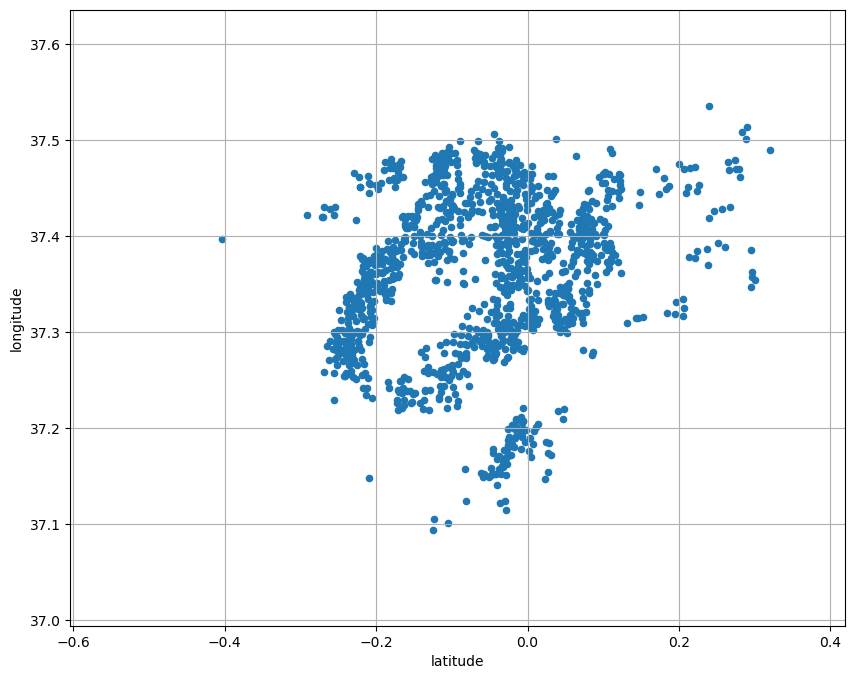

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fire2 = pd.read_csv("CSV/fire404600.csv")

# Step 2: Filter the dataset for the specified date range (2000 to 2023)
fire2['acq_date'] = pd.to_datetime(fire2['acq_date'])
fire2 = fire2[(fire2['acq_date'].dt.year >= 2000) & (fire2['acq_date'].dt.year <= 2023)]

# Step 2: Create Grid Boxes (Meshgrid)
# Define latitude and longitude ranges
lat_min, lat_max = fire2['latitude'].min() - 0.2, fire2['latitude'].max() + 0.1
lon_min, lon_max = fire2['longitude'].min() - 0.1, fire2['longitude'].max() + 0.1

# Define the step for latitudes and longitudes
lat_step, lon_step = 0.2, 0.2

lon = np.arange(lon_min, lon_max, step=0.2)
lat = np.arange(lat_min, lat_max, step=0.2)
mesh_lat, mesh_lon = np.meshgrid(lat, lon)

fig, ax = plt.subplots(figsize=(10, 8))

# Set x and y axis limits
ax.set_xlim(lat_min, lat_max)
ax.set_ylim(lon_min, lon_max)
plt.grid(True)

fire2.plot(x="latitude", y="longitude", kind="scatter", ax=ax)
plt.grid()

# Flatten the meshgrid
flatten_lat = mesh_lat.ravel()
flatten_lon = mesh_lon.ravel()

# Get the shape of the meshgrid
rows, cols = mesh_lat.shape

# Enumerate grid cells from top left to bottom right
grid_cells = []
for i in range(rows):
    for j in range(cols):
        grid_cells.append((mesh_lat[i, j], mesh_lon[i, j]))

# Create a new column 'grid_cell' in the fire_data DataFrame
fire2['grid_cells'] = np.nan

# Iterate through each grid cell and assign the corresponding grid cell index to fire_data
for idx, cell in enumerate(grid_cells):
    lat, lon = cell
    # Use numpy.isclose for floating-point comparisons
    indices = np.isclose(fire2['latitude'], lat) & np.isclose(fire2['longitude'], lon)
    # Assign the grid cell index to the 'grid_cell' column
    fire2.loc[indices, 'grid_cells'] = idx
    
# Step 4: Aggregate Data
agg_data = fire2.groupby('grid_cells').agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_data.columns = ['grid_cells', 'fire_occurrences', 'avg_bright_t31']    

# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
fire2['acq_date'] = pd.to_datetime(fire2['acq_date'])
fire2['year'] = fire2['acq_date'].dt.year
fire2['month'] = fire2['acq_date'].dt.month
fire2['semi_annual'] = (fire2['month'] - 1) // 6 + 1

agg_yearly = fire2.groupby(['grid_cells', 'year']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_yearly.columns = ['grid_cells', 'year', 'fire_occurrences_yearly', 'avg_bright_t31_yearly']

agg_monthly = fire2.groupby(['grid_cells', 'year', 'month']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_monthly.columns = ['grid_cells', 'year', 'month', 'fire_occurrences_monthly', 'avg_bright_t31_monthly']

agg_semi_annual = fire2.groupby(['grid_cells', 'year', 'semi_annual']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_semi_annual.columns = ['grid_cells', 'year', 'semi_annual', 'fire_occurrences_semi_annual', 'avg_bright_t31_semi_annual']

# Export the DataFrames to CSV files

agg_yearly.to_csv('yearly_tritri2.csv', index=False)

Cell 1: Latitude=-0.6042000000000001, Longitude=36.994299999999996
Cell 2: Latitude=-0.4904444444444445, Longitude=36.994299999999996
Cell 3: Latitude=-0.37668888888888896, Longitude=36.994299999999996
Cell 4: Latitude=-0.2629333333333334, Longitude=36.994299999999996
Cell 5: Latitude=-0.14917777777777785, Longitude=36.994299999999996
Cell 6: Latitude=-0.035422222222222244, Longitude=36.994299999999996
Cell 7: Latitude=0.07833333333333325, Longitude=36.994299999999996
Cell 8: Latitude=0.19208888888888875, Longitude=36.994299999999996
Cell 9: Latitude=0.30584444444444436, Longitude=36.994299999999996
Cell 10: Latitude=0.4196, Longitude=36.994299999999996
Cell 11: Latitude=-0.6042000000000001, Longitude=37.06562222222222
Cell 12: Latitude=-0.4904444444444445, Longitude=37.06562222222222
Cell 13: Latitude=-0.37668888888888896, Longitude=37.06562222222222
Cell 14: Latitude=-0.2629333333333334, Longitude=37.06562222222222
Cell 15: Latitude=-0.14917777777777785, Longitude=37.06562222222222
C

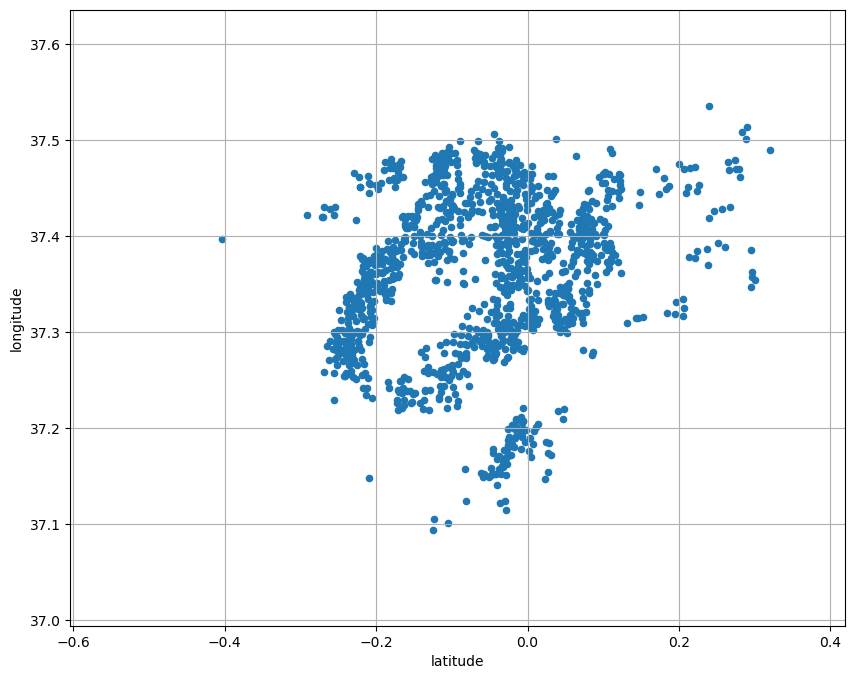

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fire2 = pd.read_csv("CSV/fire404600.csv")

# Step 2: Filter the dataset for the specified date range (2000 to 2023)
fire2['acq_date'] = pd.to_datetime(fire2['acq_date'])
fire2 = fire2[(fire2['acq_date'].dt.year >= 2000) & (fire2['acq_date'].dt.year <= 2023)]

# Step 2: Create Grid Boxes (Meshgrid)
# Define latitude and longitude ranges
lat_min, lat_max = fire2['latitude'].min() - 0.2, fire2['latitude'].max() + 0.1
lon_min, lon_max = fire2['longitude'].min() - 0.1, fire2['longitude'].max() + 0.1

# Define the step for latitudes and longitudes
lat_num, lon_num = 10, 10  # Adjust these values as needed

lon = np.linspace(lon_min, lon_max, lon_num)
lat = np.linspace(lat_min, lat_max, lat_num)
mesh_lat, mesh_lon = np.meshgrid(lat, lon)

fig, ax = plt.subplots(figsize=(10, 8))

# Set x and y axis limits
ax.set_xlim(lat_min, lat_max)
ax.set_ylim(lon_min, lon_max)
plt.grid(True)

fire2.plot(x="latitude", y="longitude", kind="scatter", ax=ax)
plt.grid()

# Flatten the meshgrid
flatten_lat = mesh_lat.ravel()
flatten_lon = mesh_lon.ravel()

# Enumerate grid cells from top left to bottom right
grid_cells = []
for i, (lat_val, lon_val) in enumerate(zip(flatten_lat, flatten_lon)):
    fire2.loc[(fire2['latitude'] == lat_val) & (fire2['longitude'] == lon_val), 'grid_cells'] = i
    grid_cells.append((lat_val, lon_val))

# Display the enumerated grid cells
for idx, cell in enumerate(grid_cells):
    print(f"Cell {idx + 1}: Latitude={cell[0]}, Longitude={cell[1]}")

# Step 4: Aggregate Data
agg_data = fire2.groupby('grid_cells').agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_data.columns = ['grid_cells', 'fire_occurrences', 'avg_bright_t31']

# Rest of your code for yearly, monthly, and semi-annual aggregation...
# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
fire2['acq_date'] = pd.to_datetime(fire2['acq_date'])
fire2['year'] = fire2['acq_date'].dt.year
fire2['month'] = fire2['acq_date'].dt.month
fire2['semi_annual'] = (fire2['month'] - 1) // 6 + 1

agg_yearly = fire2.groupby(['grid_cells', 'year']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_yearly.columns = ['grid_cells', 'year', 'fire_occurrences_yearly', 'avg_bright_t31_yearly']

agg_monthly = fire2.groupby(['grid_cells', 'year', 'month']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_monthly.columns = ['grid_cells', 'year', 'month', 'fire_occurrences_monthly', 'avg_bright_t31_monthly']

agg_semi_annual = fire2.groupby(['grid_cells', 'year', 'semi_annual']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_semi_annual.columns = ['grid_cells', 'year', 'semi_annual', 'fire_occurrences_semi_annual', 'avg_bright_t31_semi_annual']

# Export the DataFrames to CSV files

# ... (rest of your code for yearly, monthly, and semi-annual aggregation)

# Export the DataFrames to CSV files
agg_data.to_csv('grid_cell_aggregation.csv', index=False)

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fire2 = pd.read_csv("CSV/fire404600.csv")

# Step 2: Filter the dataset for the specified date range (2000 to 2023)
fire2['acq_date'] = pd.to_datetime(fire2['acq_date'])
fire2 = fire2[(fire2['acq_date'].dt.year >= 2000) & (fire2['acq_date'].dt.year <= 2023)]

# Define latitude and longitude ranges
lat_min, lat_max = fire2['latitude'].min() - 0.2, fire2['latitude'].max() + 0.1
lon_min, lon_max = fire2['longitude'].min() - 0.1, fire2['longitude'].max() + 0.1

# Define the number of bins for latitude and longitude
lat_bins = np.linspace(lat_min, lat_max, 10)  # Adjust the number of bins as needed
lon_bins = np.linspace(lon_min, lon_max, 10)  # Adjust the number of bins as needed

# Create grid cells based on latitude and longitude ranges
fire2['grid_cells'] = pd.cut(fire2['latitude'], bins=lat_bins, labels=False) * len(lon_bins) + pd.cut(fire2['longitude'], bins=lon_bins, labels=False)

# Step 4: Aggregate Data
agg_data = fire2.groupby('grid_cells').agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_data.columns = ['grid_cells', 'fire_occurrences', 'avg_bright_t31']

# Rest of your code for yearly, monthly, and semi-annual aggregation...
# Step 5: Aggregate on Yearly, Monthly, and Semi-Annual Basis
fire2['acq_date'] = pd.to_datetime(fire2['acq_date'])
fire2['year'] = fire2['acq_date'].dt.year
fire2['month'] = fire2['acq_date'].dt.month
fire2['semi_annual'] = (fire2['month'] - 1) // 6 + 1

agg_yearly = fire2.groupby(['grid_cells', 'year']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_yearly.columns = ['grid_cells', 'year', 'fire_occurrences_yearly', 'avg_bright_t31_yearly']

agg_monthly = fire2.groupby(['grid_cells', 'year', 'month']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_monthly.columns = ['grid_cells', 'year', 'month', 'fire_occurrences_monthly', 'avg_bright_t31_monthly']

agg_semi_annual = fire2.groupby(['grid_cells', 'year', 'semi_annual']).agg({
    'acq_date': 'count',
    'bright_t31': 'mean'
}).reset_index()
agg_semi_annual.columns = ['grid_cells', 'year', 'semi_annual', 'fire_occurrences_semi_annual', 'avg_bright_t31_semi_annual']

# ... (rest of your code for yearly, monthly, and semi-annual aggregation)

# Export the DataFrames to CSV files
agg_data.to_csv('grid_cell_aggregation1.csv', index=False)